# Kernel SVM

## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
dataset = pd.read_csv('Diabetes Prediction Dataset.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:,  -1].values

# Encoding data

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
x[:, 0] = le.fit_transform(x[:, 0])
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
print(x)

[[0.0 0.0 0.0 ... 25.19 6.6 140]
 [1.0 0.0 0.0 ... 27.32 6.6 80]
 [0.0 0.0 0.0 ... 27.32 5.7 158]
 ...
 [0.0 0.0 0.0 ... 27.83 5.7 155]
 [0.0 0.0 0.0 ... 35.42 4.0 100]
 [0.0 1.0 0.0 ... 22.43 6.6 90]]


## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xTrain = sc.fit_transform(xTrain)
xTest = sc.transform(xTest)

## Training the Kernel SVM model on the Training set

In [8]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(xTrain, yTrain)

SVC(random_state=0)

## Making the Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
yPred = classifier.predict(xTest)
cm = confusion_matrix(yTest, yPred)
print(cm)
accuracy_score(yTest, yPred)

[[22860    35]
 [  887  1218]]


0.96312

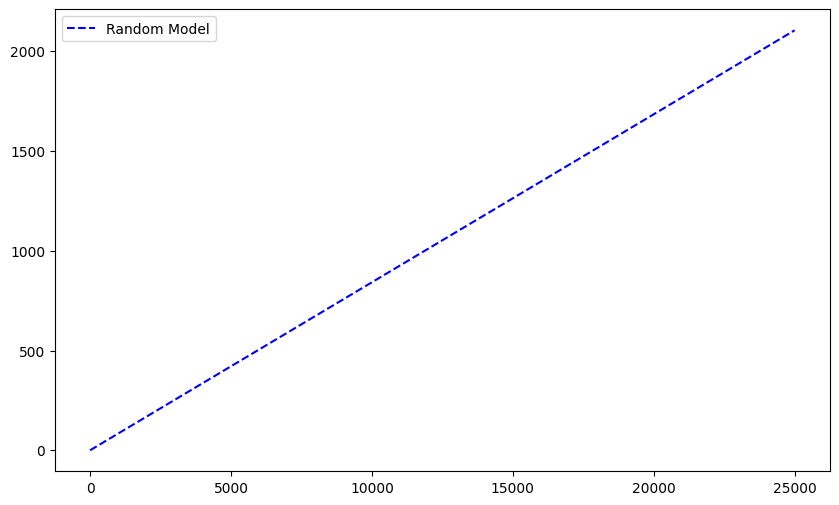

In [10]:
total = len(yTest)
one_count = np.sum(yTest)
zero_count = total - one_count
plt.figure(figsize = (10, 6))
plt.plot([0, total], [0, one_count], c = 'b', linestyle = '--', label = 'Random Model')
plt.legend()

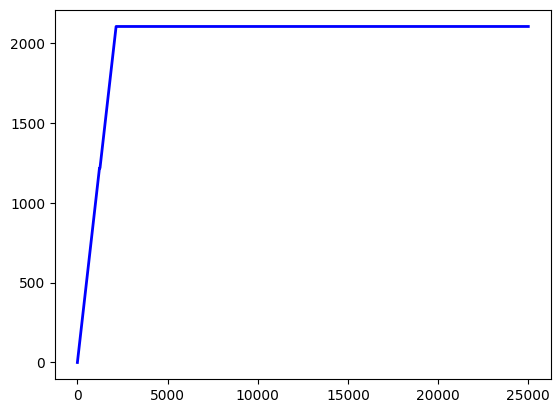

In [11]:
lm = [y for _, y in sorted(zip(yPred, yTest), reverse = True)]
x = np.arange(0, total + 1)
y = np.append([0], np.cumsum(lm))
plt.plot(x, y, c = 'b', label = 'Random classifier', linewidth = 2)

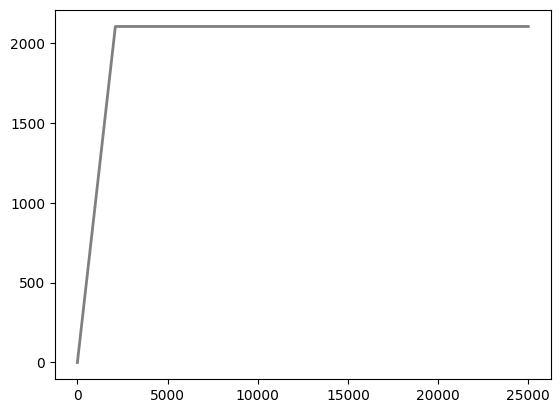

In [12]:
plt.plot([0, one_count, total], [0, one_count, one_count], c = 'grey', linewidth = 2, label = 'Perfect Model')